<a href="https://colab.research.google.com/github/esskay92/IS407/blob/main/IS_407_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IS 407 Final Project**

#### Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import tree
import graphviz
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


ModuleNotFoundError: ignored

In [ ]:
pip install scikit-learn-extra

In [ ]:
pip install scikit-learn-extra

## **1. Data Preliminaries**

#### 1.1 Load Dataset

In [ ]:
df = pd.read_csv('movie_metadata.csv')
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.00,178.00,0.00,855.00,Joel David Moore,"1,000.00","760,505,847.00",Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.00,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,"3,054.00",English,USA,PG-13,"237,000,000.00","2,009.00",936.00,7.90,1.78,33000
1,Color,Gore Verbinski,302.00,169.00,563.00,"1,000.00",Orlando Bloom,"40,000.00","309,404,152.00",Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.00,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,"1,238.00",English,USA,PG-13,"300,000,000.00","2,007.00","5,000.00",7.10,2.35,0
2,Color,Sam Mendes,602.00,148.00,0.00,161.00,Rory Kinnear,"11,000.00","200,074,175.00",Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.00,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.00,English,UK,PG-13,"245,000,000.00","2,015.00",393.00,6.80,2.35,85000
3,Color,Christopher Nolan,813.00,164.00,"22,000.00","23,000.00",Christian Bale,"27,000.00","448,130,642.00",Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.00,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,"2,701.00",English,USA,PG-13,"250,000,000.00","2,012.00","23,000.00",8.50,2.35,164000
4,NaN,Doug Walker,nan,nan,131.00,nan,Rob Walker,131.00,nan,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.00,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,nan,NaN,NaN,NaN,nan,nan,12.00,7.10,nan,0


In [ ]:
df.shape

(5043, 28)

In [ ]:
df.dtypes

color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

#### 1.2 Data Cleaning

In [ ]:
df.isna().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

Since we have quite a lot of null values, we decided to drop them instead of replacing them.

In [ ]:
df = df.dropna()
df.shape

(3756, 28)

#### 1.3 Data Processing

Because our goal is to find the factors that determine the success of movies in terms of profit and review scores, we must define the standards: 


*   A movie is successful if the net profit is at least twice the budget
*   A movie is successful if user rating is higher than 8



In [ ]:
df['profit'] = df['gross'] - df['budget']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df['earning_rate'] = (df['gross'] - df['budget']) / df['budget']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Created column 'y_profit' where '1' represents successful and '0' otherwise.

In [ ]:
df['y_profit'] = np.where(df['earning_rate'] >= 2, 1, 0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
len(df[df['y_profit'] == 1])

666

Created column 'y_rating' where '1' represents successful and '0' otherwise.

In [ ]:
df['y_rating'] = np.where(df['imdb_score'] > 8, 1, 0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
len(df[df['y_rating'] == 1])

158

Created column 'y_both' where '1' represents success in both profit and review and '0' otherwise.

In [ ]:
df['y_both'] = np.where((df['y_rating'] == 1) & (df['y_profit'] == 1), 1, 0)
df.head(1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit,earning_rate,y_profit,y_rating,y_both
0,Color,James Cameron,723.00,178.00,0.00,855.00,Joel David Moore,"1,000.00","760,505,847.00",Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.00,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,"3,054.00",English,USA,PG-13,"237,000,000.00","2,009.00",936.00,7.90,1.78,33000,"523,505,847.00",2.21,1,0,0


In [ ]:
len(df[df['y_both'] == 1])

63

#### **1.4 Genres Column Manipulation**

Since the 'genres' column contains combinations of different genres (main genre + sub-genres), we decided to extract the main genre for easier analysis.

In [ ]:
df['main_genre'] = df['genres'].str.extract('(^[a-zA-Z ]+)')
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit,earning_rate,y_profit,y_rating,y_both,main_genre
0,Color,James Cameron,723.00,178.00,0.00,855.00,Joel David Moore,"1,000.00","760,505,847.00",Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.00,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,"3,054.00",English,USA,PG-13,"237,000,000.00","2,009.00",936.00,7.90,1.78,33000,"523,505,847.00",2.21,1,0,0,Action
1,Color,Gore Verbinski,302.00,169.00,563.00,"1,000.00",Orlando Bloom,"40,000.00","309,404,152.00",Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.00,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,"1,238.00",English,USA,PG-13,"300,000,000.00","2,007.00","5,000.00",7.10,2.35,0,"9,404,152.00",0.03,0,0,0,Action
2,Color,Sam Mendes,602.00,148.00,0.00,161.00,Rory Kinnear,"11,000.00","200,074,175.00",Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.00,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.00,English,UK,PG-13,"245,000,000.00","2,015.00",393.00,6.80,2.35,85000,"-44,925,825.00",-0.18,0,0,0,Action
3,Color,Christopher Nolan,813.00,164.00,"22,000.00","23,000.00",Christian Bale,"27,000.00","448,130,642.00",Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.00,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,"2,701.00",English,USA,PG-13,"250,000,000.00","2,012.00","23,000.00",8.50,2.35,164000,"198,130,642.00",0.79,0,1,0,Action
5,Color,Andrew Stanton,462.00,132.00,475.00,530.00,Samantha Morton,640.00,"73,058,679.00",Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.00,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.00,English,USA,PG-13,"263,700,000.00","2,012.00",632.00,6.60,2.35,24000,"-190,641,321.00",-0.72,0,0,0,Action


## **2. Data Overview**

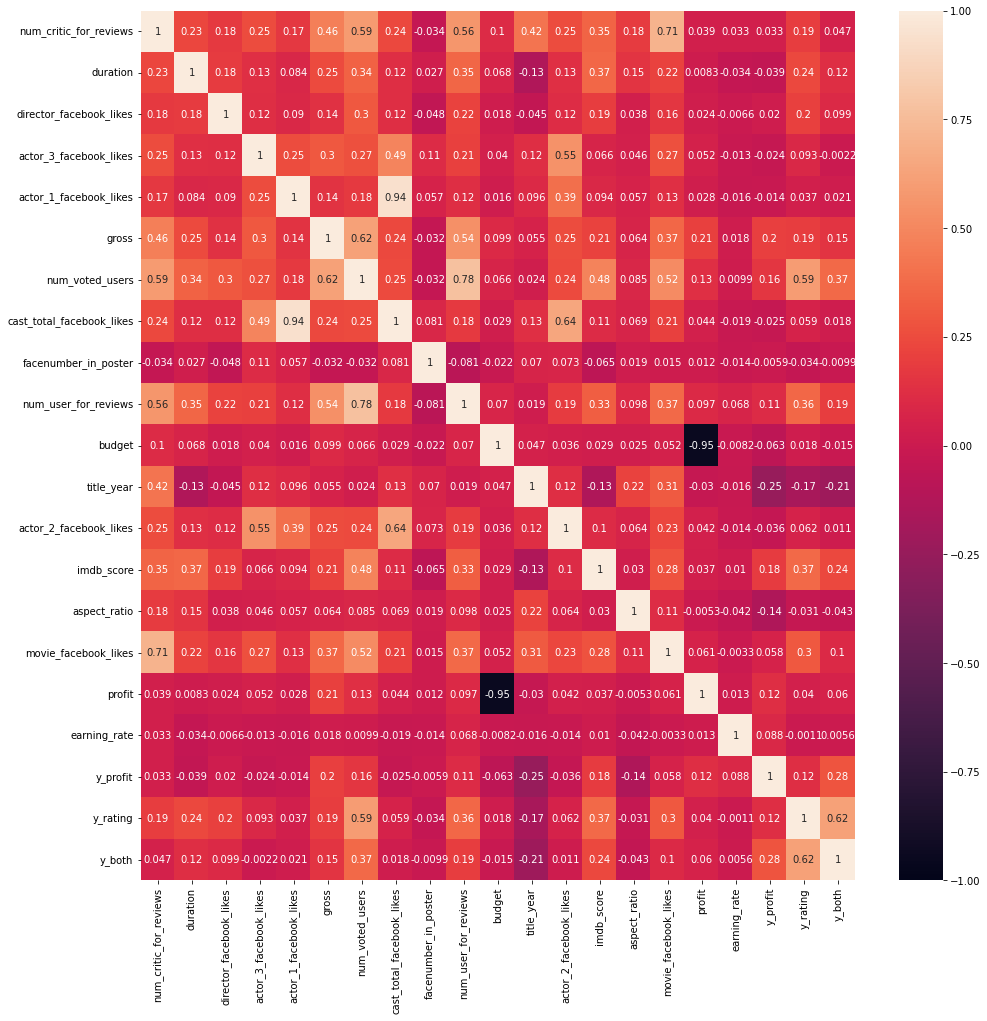

In [ ]:
plt.figure(figsize=(16, 16))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)

In [ ]:
df.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit,earning_rate,y_profit,y_rating,y_both
count,"3,756.00","3,756.00","3,756.00","3,756.00","3,756.00","3,756.00","3,756.00","3,756.00","3,756.00","3,756.00","3,756.00","3,756.00","3,756.00","3,756.00","3,756.00","3,756.00","3,756.00","3,756.00","3,756.00","3,756.00","3,756.00"
mean,167.38,110.26,807.34,771.28,"7,751.34","52,612,824.24","105,826.73","11,527.10",1.38,336.84,"46,236,849.64","2,002.98","2,021.78",6.47,2.11,"9,353.83","6,375,974.60",5.42,0.18,0.04,0.02
std,123.45,22.65,"3,068.17","1,894.25","15,519.34","70,317,866.91","152,035.40","19,122.18",2.04,411.23,"226,010,288.48",9.89,"4,544.91",1.06,0.35,"21,462.89","229,919,000.68",131.93,0.38,0.20,0.13
min,2.00,37.00,0.00,0.00,0.00,162.00,91.00,0.00,0.00,4.00,218.00,"1,927.00",0.00,1.60,1.18,0.00,"-12,213,298,588.00",-1.00,0.00,0.00,0.00
25%,77.00,96.00,11.00,194.00,745.00,"8,270,232.75","19,667.00","1,919.75",0.00,110.00,"10,000,000.00","1,999.00",384.75,5.90,1.85,0.00,"-10,503,628.75",-0.52,0.00,0.00,0.00
50%,138.50,106.00,64.00,436.00,"1,000.00","30,093,107.00","53,973.50","4,059.50",1.00,210.00,"25,000,000.00","2,004.00",685.50,6.60,2.35,227.00,"1,600,370.50",0.10,0.00,0.00,0.00
75%,224.00,120.00,235.00,691.00,"13,000.00","66,881,940.75","128,602.00","16,240.00",2.00,398.25,"50,000,000.00","2,010.00",976.00,7.20,2.35,"11,000.00","25,954,814.00",1.25,0.00,0.00,0.00
max,813.00,330.00,"23,000.00","23,000.00","640,000.00","760,505,847.00","1,689,764.00","656,730.00",43.00,"5,060.00","12,215,500,000.00","2,016.00","137,000.00",9.30,16.00,"349,000.00","523,505,847.00","7,193.49",1.00,1.00,1.00


## **3. Descriptive Analytics for Profit**

##### 3.1 Relation between Profit and Genre

In [ ]:
tmp = pd.crosstab(df['main_genre'], df['y_profit'])
tmp

y_profit,0,1
main_genre,,
Action,859,100
Adventure,318,51
Animation,38,7
Biography,172,33
Comedy,776,213
Crime,223,32
Documentary,17,9
Drama,539,129
Family,2,1


We define a movie being successful in terms of profit if the net profit is at least twice the budget amount. In the data preliminaries section, we defined a y_profit column where '1' represents a successfuk movie while '0' is otherwise. Here, we see the number of movies that were or weren't successful in terms of profit per movie genre.

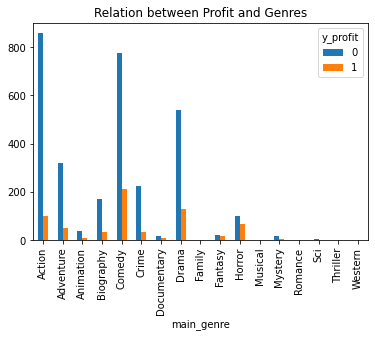

In [ ]:
tmp.plot.bar()
plt.title("Relation between Profit and Genres")
plt.show()

This bar graph is another way to represent the relationship between Profit and Genres. Once again,'1' in orange represents a successful movie while '0' in blue is otherwise. From this visual, we can see that comedy movies are more likely to be successful than any other movie genere, however, all movies (regarless of genere) are more likely to be unsuccessful.

##### 3.2 Relation between Profit and Number of Critics

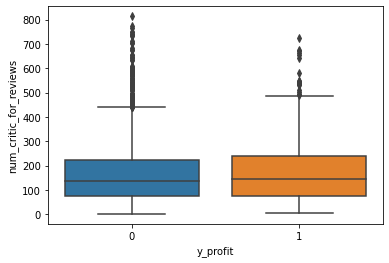

In [ ]:
sns.boxplot(x='y_profit', y='num_critic_for_reviews', data=df)
plt.show()

In this boxplot, '1' in orange represents a successful movie while '0' in blue is otherwise. From this, we can see that the difference in the number of critic reviwers and whether a movie is successful or not, is pretty small; especially when in comparison to the relationship between ratings and critic reviewers in section 4.2.

##### 3.3 Relation between Profit and Number of User Reviews


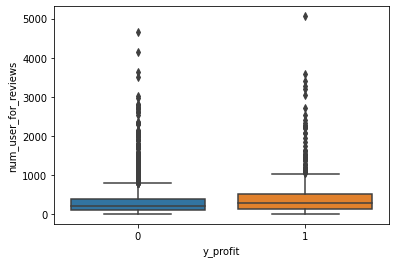

In [ ]:
sns.boxplot(x='y_profit', y='num_user_for_reviews', data=df)

In this boxplot, '1' in orange represents a successful movie while '0' in blue is otherwise. From this, we can, once again, see that the difference in the number of user reviwers and whether a movie is successful or not, is pretty small; especially when in comparison to the relationship between ratings and user reviewers in section 4.3. However, this difference is bigger than that between critic reviewers and profit in section 3.2.

##### 3.4 Relation between Profit and Total Cast Facebook Likes

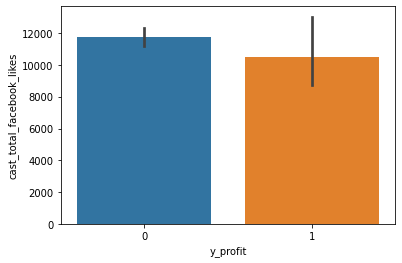

In [ ]:
sns.barplot(x='y_profit', y='cast_total_facebook_likes', data=df)
plt.show()

In this bar chart, '1' in orange represents a successful movie while '0' in blue is otherwise. From this chart we can see that unsuccessful movies garnered more cast member Facebook likes than successful movies. This is an intersting correlation as one would assume more likes means more people are aware of the movie which could mean a higher profit since people are more likely to go see the movie.

This is relationship could be explained by the possibility that movie production companies may spend part of a movies budget paying cast members to advertise the movie they are in. Paying cast members to advertise accounts for the increase in Facebook likes, but a still unsuccessful movie.  


#### 3.5 Relation between Profit and Movie Facebook Likes

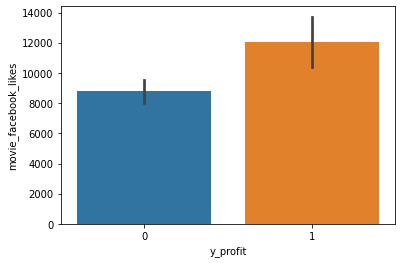

In [ ]:
sns.barplot(x='y_profit', y='movie_facebook_likes', data=df)
plt.show()

In this bar chart, '1' in orange represents a successful movie while '0' in blue is otherwise. From this chart we can see that successful movies garnered more movie Facebook likes than unsuccessful movies. This correlation would matched the a possible senerio given in 3.4. Movie production companies don't have to pay cast members to advertise when they are advertising on their own page.   

#### 3.6 Relation between Profit and Review Score

/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


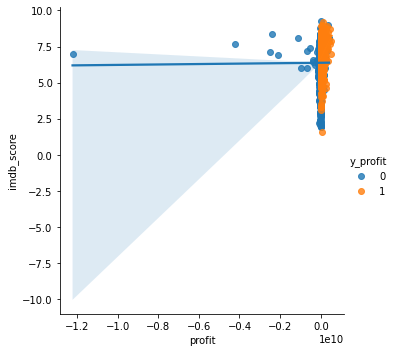

In [ ]:
sns.lmplot(x='profit', y='imdb_score', hue='y_profit', data=df, size=5)
plt.show()

In [ ]:
df.groupby('y_profit')[['profit', 'imdb_score']].corr()

profit  imdb_score
y_profit                               
0        profit        1.00        0.00
         imdb_score    0.00        1.00
1        profit        1.00        0.21
         imdb_score    0.21        1.00

## **4. Descriptive Analytics for Ratings**

4.1 Relation between Ratings and Genre


In [ ]:
tmp2 = pd.crosstab(df['main_genre'], df['y_rating'])
tmp2

y_rating,0,1
main_genre,,
Action,925,34
Adventure,341,28
Animation,45,0
Biography,189,16
Comedy,977,12
Crime,235,20
Documentary,22,4
Drama,631,37
Family,3,0


We define a movie being successful in terms of ratings if their imdb score is greater than 8. In the data preliminaries section, we defined a y_rating column where '1' represents a successful movie while '0' is otherwise. Here we see the number of movies that were or weren't successful per movie genre.

Action movies are seen as having the highest number of successful movies while Animation, Family, Fantasy, Musical, Romance, and Thriller are seen as having the lowest number of successful movies.

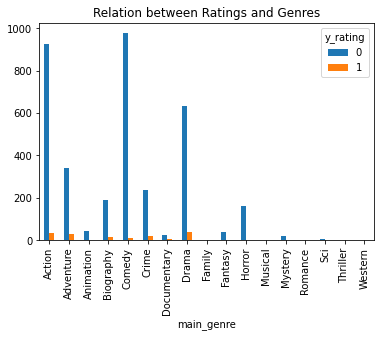

In [ ]:
tmp2.plot.bar()
plt.title("Relation between Ratings and Genres")
plt.show()

 This bar graph is another way to represent the relationship between Ratings and Genres. Once again,'1' in orange represents a successful movie while '0' in blue is otherwise. From this visual, we can see that movies, regardless of genere, are more likely to be unsuccessful than successful.

4.2 Relation between Ratings and Number of Critics

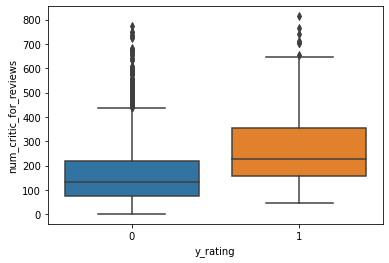

In [ ]:
sns.boxplot(x='y_rating', y='num_critic_for_reviews', data=df)
plt.show()

In this boxplot, '1' in orange represents a successful movie while '0' in blue is otherwise. From this, we can infer that a movie is more likely to be considered unsuccessful when it has less critics reviewing it and more likely to be successful when it has more critics reviewing it. 

Logically this makes sense, as having less critics reviewing a movie means that each critics review is "worth" more than if more critics reviewed a movie.

4.3 Relation between Ratings and Number of User Reviews

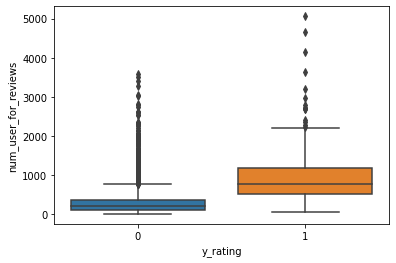

In [ ]:
sns.boxplot(x='y_rating', y='num_user_for_reviews', data=df)

In this boxplot, '1' in orange represents a successful movie while '0' in blue is otherwise. This boxplot echos the results we found in 4.2, excpet with user reviwers instead of critic reviewers. The more user reviewers a movie has, the more likely it is that it was be consiered successful when compared to a movie with less viewer reviewers. A similar logic from 4.2 also applies here, where the "weight" or "worth" of a single review changes based on home many total people review it.

4.4 Relation between Ratings and Total Cast Facebook Likes

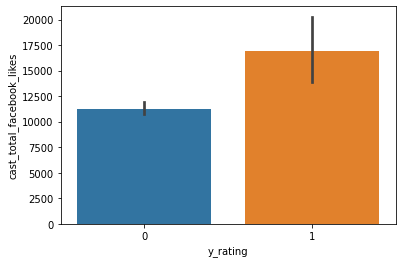

In [ ]:
sns.barplot(x='y_rating', y='cast_total_facebook_likes', data=df)

In this bar chart, '1' in orange represents a successful movie while '0' in blue is otherwise. From this chart we can see that successful movies have garnered more cast member Facebook likes than unsuccessful movies. A possible reason for this is that Facebook is a huge platform when it comes to marketing and advertising, additionaly, the cast of movies usually have a decent size following. So movies with more likes via a cast members Facebook means it reached more viewers in terms of just advertising that a movie they are a part of is avaliable.

4.5 Relation between Ratings and Movie Facebook Likes

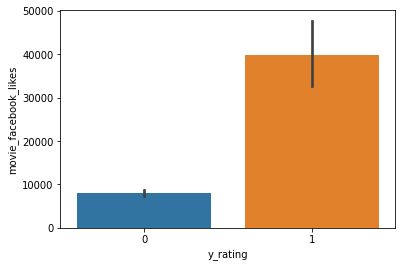

In [ ]:
sns.barplot(x='y_rating', y='movie_facebook_likes', data=df)

In this bar chart, '1' in orange represents a successful movie while '0' in blue is otherwise. From this chart we can see that once again, successful movies have garnered more movie Facebook likes than unsuccessful movies. The same reason of Facebook being a huge advertising and marketing platform applies. Often times movies will have their own Facebook page dedicated to advertising the movie. So movies with more Facebook likes means it reached more viewers in terms of just advertising that their movie is avalible.

## **5. Linear Regression**

#### 5.1 Linear Regression Model for Profit

In [ ]:
feature_columns = ['num_critic_for_reviews','duration','director_facebook_likes','actor_3_facebook_likes','actor_1_facebook_likes','gross','num_voted_users','cast_total_facebook_likes','facenumber_in_poster','num_user_for_reviews','actor_2_facebook_likes','movie_facebook_likes']

X = df[feature_columns]
y = df['profit']

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# create linear regression object
reg = linear_model.LinearRegression()

# train the model using the training sets
reg.fit(X_train, y_train)

# regression coefficients
print('Coefficients: ', reg.coef_)
 
# variance score: 1 means perfect prediction
print('Variance score: {}'.format(reg.score(X_test, y_test)))


Coefficients:  [-2.76818340e+05 -5.77790222e+05  3.86675283e+02 -5.53932196e+03
 -3.25135516e+03  7.67260843e-01  5.10760563e+01  3.48260926e+03
  2.48254601e+06  1.30672092e+04 -3.66296783e+03  7.53157962e+02]
Variance score: 0.37024690446018416


In [ ]:
results = sm.OLS(y, X).fit()


In [ ]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 profit   R-squared (uncentered):                   0.051
Model:                            OLS   Adj. R-squared (uncentered):              0.048
Method:                 Least Squares   F-statistic:                              16.77
Date:                Mon, 13 Dec 2021   Prob (F-statistic):                    1.91e-35
Time:                        12:02:34   Log-Likelihood:                         -77547.
No. Observations:                3756   AIC:                                  1.551e+05
Df Residuals:                    3744   BIC:                                  1.552e+05
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
num_critic_for_reviews    -1.865e+05   4.59e+04     -4.067      0.000   -2.76e+05   -9.66e+04
duration                  -1.512e+05   6.77e+04     -2.235      0.025   -2.84e+05   -1.86e+04
director_facebook_likes      -0.6387   1261.146     -0.001      1.000   -2473.238    2471.960
actor_3_facebook_likes    -3783.4055   5648.906     -0.670      0.503   -1.49e+04    7291.828
actor_1_facebook_likes    -1713.8732   3436.910     -0.499      0.618   -8452.270    5024.524
gross                         0.7457      0.071     10.517      0.000       0.607       0.885
num_voted_users              49.0393     45.412      1.080      0.280     -39.996     138.075
cast_total_facebook_likes  1811.9469   3424.919      0.529      0.597   -4902.942    8526.836
facenumber_in_poster       2.405e+06   1.82e+06      1.325      0.185   -1.15e+06    5.96e+06
num_user_for_reviews       2053.5348   1.51e+04      0.136      0.892   -2.75e+04    3.16e+04
actor_2_facebook_likes    -1946.9202   3613.025     -0.539      0.590   -9030.608    5136.768
movie_facebook_likes        391.0525    248.285      1.575      0.115     -95.735     877.840
==============================================================================
Omnibus:                    11460.160   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        852875188.575
Skew:                         -45.004   Prob(JB):                         0.00
Kurtosis:                    2335.719   Cond. No.                     4.35e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.35e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

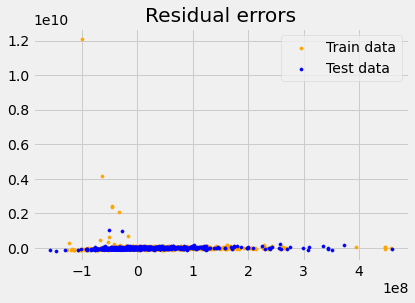

In [ ]:
# plot for residual error
 
## setting plot style
plt.style.use('fivethirtyeight')
 
## plotting residual errors in training data
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train,
            color = "orange", s = 10, label = 'Train data')
 
## plotting residual errors in test data
plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test,
            color = "blue", s = 10, label = 'Test data')
 
## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
 
## plotting legend
plt.legend(loc = 'upper right')
 
## plot title
plt.title("Residual errors")
 
## method call for showing the plot
plt.show()

#### 5.2 Linear Regression Model for Rating

In [ ]:
feature_columns = ['num_critic_for_reviews','duration','director_facebook_likes','actor_3_facebook_likes','actor_1_facebook_likes','gross','num_voted_users','cast_total_facebook_likes','facenumber_in_poster','num_user_for_reviews','budget','actor_2_facebook_likes','movie_facebook_likes']

X = df[feature_columns]
y = df['imdb_score']

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# create linear regression object
reg = linear_model.LinearRegression()

# train the model using the training sets
reg.fit(X_train, y_train)

# regression coefficients
print('Coefficients: ', reg.coef_)
 
# variance score: 1 means perfect prediction
print('Variance score: {}'.format(reg.score(X_test, y_test)))

Coefficients:  [ 1.51058180e-03  1.16993008e-02  4.46270529e-06  1.15116018e-04
  9.53161097e-05 -2.00263222e-09  4.09742255e-06 -9.60906609e-05
 -3.47413272e-02 -5.81781132e-04 -3.29952402e-11  9.84760626e-05
 -2.83909396e-06]
Variance score: 0.3192419655228438


In [ ]:
results = sm.OLS(y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             imdb_score   R-squared (uncentered):                   0.963
Model:                            OLS   Adj. R-squared (uncentered):              0.963
Method:                 Least Squares   F-statistic:                              7567.
Date:                Mon, 13 Dec 2021   Prob (F-statistic):                        0.00
Time:                        12:02:34   Log-Likelihood:                         -6180.4
No. Observations:                3756   AIC:                                  1.239e+04
Df Residuals:                    3743   BIC:                                  1.247e+04
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
num_critic_for_reviews        0.0049      0.000     18.933      0.000       0.004       0.005
duration                      0.0523      0.000    138.025      0.000       0.052       0.053
director_facebook_likes   -1.478e-05   7.06e-06     -2.093      0.036   -2.86e-05   -9.32e-07
actor_3_facebook_likes    -1.144e-05   3.16e-05     -0.362      0.718   -7.35e-05    5.06e-05
actor_1_facebook_likes     1.935e-05   1.92e-05      1.006      0.315   -1.84e-05    5.71e-05
gross                     -1.888e-09   3.98e-10     -4.747      0.000   -2.67e-09   -1.11e-09
num_voted_users            3.271e-06   2.54e-07     12.864      0.000    2.77e-06    3.77e-06
cast_total_facebook_likes -1.669e-05   1.92e-05     -0.870      0.384   -5.43e-05    2.09e-05
facenumber_in_poster          0.0095      0.010      0.930      0.352      -0.010       0.029
num_user_for_reviews         -0.0011   8.43e-05    -12.636      0.000      -0.001      -0.001
budget                        -2e-10   9.15e-11     -2.185      0.029   -3.79e-10   -2.05e-11
actor_2_facebook_likes     1.176e-05   2.02e-05      0.581      0.561   -2.79e-05    5.14e-05
movie_facebook_likes      -1.516e-05   1.39e-06    -10.898      0.000   -1.79e-05   -1.24e-05
==============================================================================
Omnibus:                      943.125   Durbin-Watson:                   1.633
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5501.820
Skew:                          -1.065   Prob(JB):                         0.00
Kurtosis:                       8.533   Cond. No.                     1.15e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

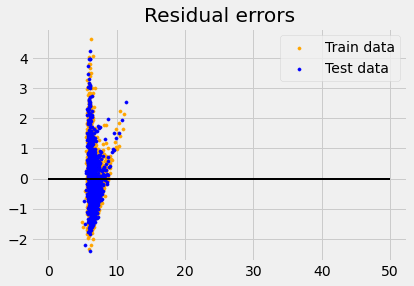

In [ ]:
# plot for residual error
 
## setting plot style
plt.style.use('fivethirtyeight')
 
## plotting residual errors in training data
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train,
            color = "orange", s = 10, label = 'Train data')
 
## plotting residual errors in test data
plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test,
            color = "blue", s = 10, label = 'Test data')
 
## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
 
## plotting legend
plt.legend(loc = 'upper right')
 
## plot title
plt.title("Residual errors")
 
## method call for showing the plot
plt.show()

## **6.Logistic Regression**

#### 6.1 Logistic Regression Model for profit and rating


In [ ]:
# Column selection for feature and target variables for profit and rating
feature_columns = ['num_critic_for_reviews','duration','director_facebook_likes','actor_3_facebook_likes','actor_1_facebook_likes','gross','num_voted_users','cast_total_facebook_likes','facenumber_in_poster','num_user_for_reviews','budget','actor_2_facebook_likes','movie_facebook_likes']

X = df[feature_columns]
y = df['y_both']

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

model = LogisticRegression(solver='liblinear', random_state=0)

model = LogisticRegression(solver='liblinear', C=10.0, random_state=0)
model.fit(X, y)

LogisticRegression(C=10.0, random_state=0, solver='liblinear')

In [ ]:
# Prediction
p_pred = model.predict_proba(X)
y_pred = model.predict(X)
score_ = model.score(X, y)
conf_m = confusion_matrix(y, y_pred)
report = classification_report(y, y_pred)

In [ ]:
# Evaluating the model
print('score:', score_, end='\n')
print('confusion matrix:', conf_m, sep='\n', end='\n')
print('report:', report, sep='\n')

score: 0.9691160809371672
confusion matrix:
[[3614   79]
 [  37   26]]
report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      3693
           1       0.25      0.41      0.31        63

    accuracy                           0.97      3756
   macro avg       0.62      0.70      0.65      3756
weighted avg       0.98      0.97      0.97      3756



#### 6.2 Fit Logistic Regression Model for rating

In [ ]:
# Column selection for feature and target variables for rating
feature_columns = ['num_critic_for_reviews','duration','director_facebook_likes','actor_3_facebook_likes','actor_1_facebook_likes','gross','num_voted_users','cast_total_facebook_likes','facenumber_in_poster','num_user_for_reviews','budget','actor_2_facebook_likes','movie_facebook_likes']

X = df[feature_columns]
y = df['y_rating']

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

model = LogisticRegression(solver='liblinear', random_state=0)

model = LogisticRegression(solver='liblinear', C=10.0, random_state=0)
model.fit(X, y)

LogisticRegression(C=10.0, random_state=0, solver='liblinear')

In [ ]:
# Prediction
p_pred = model.predict_proba(X)
y_pred = model.predict(X)
score_ = model.score(X, y)
conf_m = confusion_matrix(y, y_pred)
report = classification_report(y, y_pred)

In [ ]:
# Evaluating the model
print('score:', score_, end='\n')
print('confusion matrix:', conf_m, sep='\n', end='\n')
print('report:', report, sep='\n')

score: 0.9358359957401491
confusion matrix:
[[3432  166]
 [  75   83]]
report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.97      3598
           1       0.33      0.53      0.41       158

    accuracy                           0.94      3756
   macro avg       0.66      0.74      0.69      3756
weighted avg       0.95      0.94      0.94      3756



#### 6.3 Fit Logistic Regression Model for profit

In [ ]:
# Column selection for feature and target variables for profit
feature_columns = ['num_critic_for_reviews','duration','director_facebook_likes','actor_3_facebook_likes','actor_1_facebook_likes','gross','num_voted_users','cast_total_facebook_likes','facenumber_in_poster','num_user_for_reviews','actor_2_facebook_likes','movie_facebook_likes']

X = df[feature_columns]
y = df['y_profit']

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

model = LogisticRegression(solver='liblinear', random_state=0)

model = LogisticRegression(solver='liblinear', C=10.0, random_state=0)
model.fit(X, y)

LogisticRegression(C=10.0, random_state=0, solver='liblinear')

In [ ]:
# Prediction
p_pred = model.predict_proba(X)
y_pred = model.predict(X)
score_ = model.score(X, y)
conf_m = confusion_matrix(y, y_pred)
report = classification_report(y, y_pred)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Evaluating the model
print('score:', score_, end='\n')
print('confusion matrix:', conf_m, sep='\n', end='\n')
print('report:', report, sep='\n')

score: 0.8226837060702875
confusion matrix:
[[3090    0]
 [ 666    0]]
report:
              precision    recall  f1-score   support

           0       0.82      1.00      0.90      3090
           1       0.00      0.00      0.00       666

    accuracy                           0.82      3756
   macro avg       0.41      0.50      0.45      3756
weighted avg       0.68      0.82      0.74      3756



## **7. Decision Tree**

### 7.1 Decision Tree Model for Profits only

In [ ]:
# Column selection for feature and target variables for profit
feature_columns = ['num_critic_for_reviews','duration','director_facebook_likes','actor_3_facebook_likes','actor_1_facebook_likes','gross','num_voted_users','cast_total_facebook_likes','facenumber_in_poster','num_user_for_reviews','actor_2_facebook_likes','movie_facebook_likes']

X = df[feature_columns]
y = df['y_profit']

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Create Decision Tree Classifier object
clf = DecisionTreeClassifier(criterion="gini", max_depth=14, splitter="best")

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:",metrics.confusion_matrix(y_test, y_pred))

# Report
print("Report:",metrics.classification_report(y_test, y_pred))

Accuracy: 0.7657497781721384
Confusion Matrix: [[800 133]
 [131  63]]
Report:               precision    recall  f1-score   support

           0       0.86      0.86      0.86       933
           1       0.32      0.32      0.32       194

    accuracy                           0.77      1127
   macro avg       0.59      0.59      0.59      1127
weighted avg       0.77      0.77      0.77      1127



Explaination here

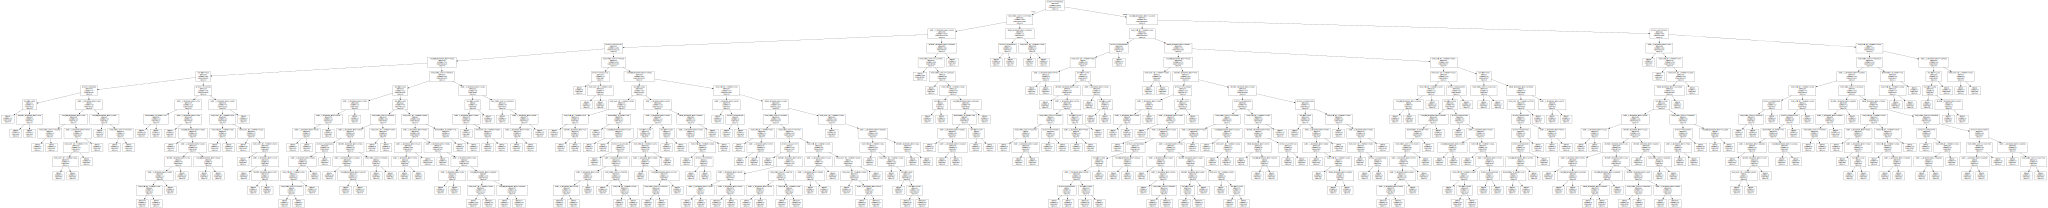

In [ ]:
tree = export_graphviz(clf,out_file='tree.dot', feature_names=X_train.columns, class_names=['0','1'])
with open("/content/tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph, format="png")

In [ ]:
system(dot -Tpng tree.dot -o ptree.png)

[]

### 7.2 Decision Tree Model for Ratings only

In [ ]:
# Column selection for feature and target variables for rating
feature_columns = ['num_critic_for_reviews','duration','director_facebook_likes','actor_3_facebook_likes','actor_1_facebook_likes','gross','num_voted_users','cast_total_facebook_likes','facenumber_in_poster','num_user_for_reviews','budget','actor_2_facebook_likes','movie_facebook_likes']

X = df[feature_columns]
y = df['y_rating']

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Create Decision Tree Classifier object
clf = DecisionTreeClassifier(criterion="gini", max_depth=14, splitter="best")

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:",metrics.confusion_matrix(y_test, y_pred))

# Report
print("Report:",metrics.classification_report(y_test, y_pred))

Accuracy: 0.9724933451641526
Confusion Matrix: [[1066   15]
 [  16   30]]
Report:               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1081
           1       0.67      0.65      0.66        46

    accuracy                           0.97      1127
   macro avg       0.83      0.82      0.82      1127
weighted avg       0.97      0.97      0.97      1127



Explaination here

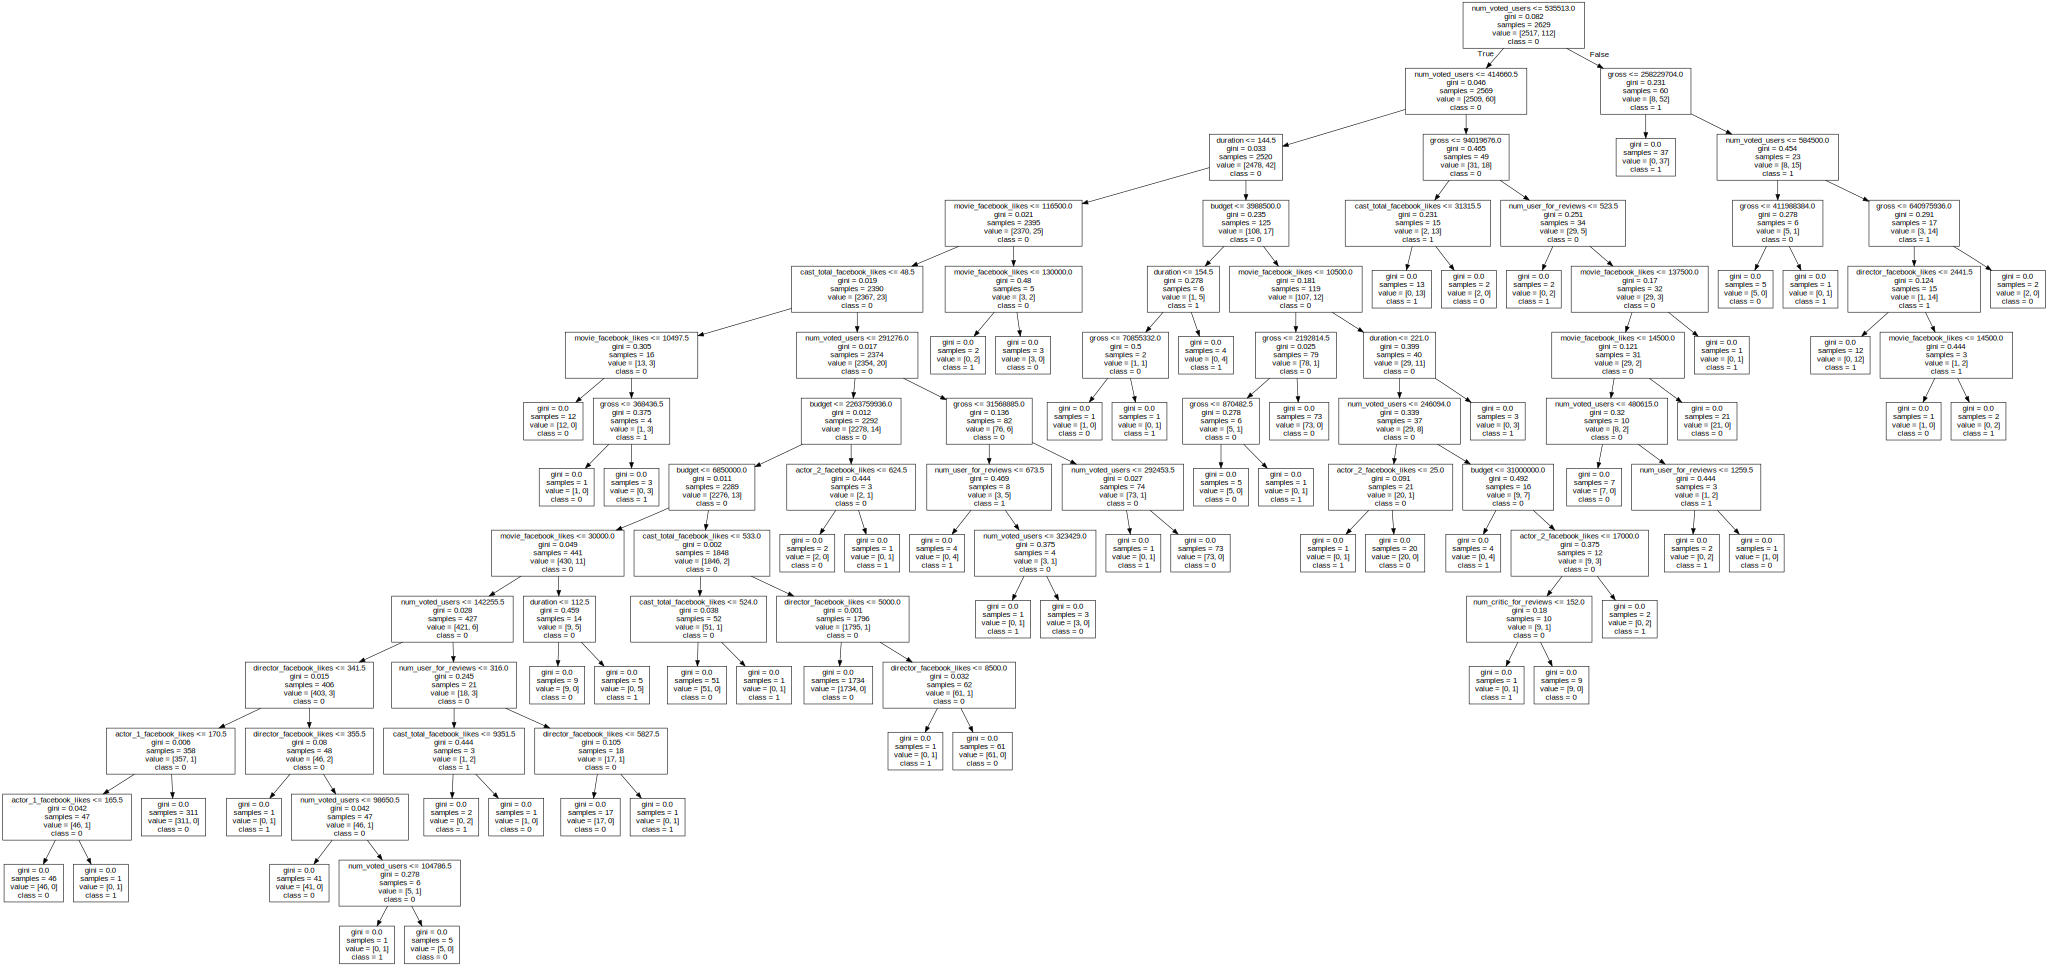

In [ ]:
tree = export_graphviz(clf,out_file='rtree.dot', feature_names=X_train.columns, class_names=['0','1'])
with open("/content/rtree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph, format="png")

In [ ]:
system(dot -Tpng rtree.dot -o rtree.png)

[]

### 7.3 Decision Tree Model for both Profits and Ratings

In [ ]:
# Column selection for feature and target variables for profit and rating
feature_columns = ['num_critic_for_reviews','duration','director_facebook_likes','actor_3_facebook_likes','actor_1_facebook_likes','gross','num_voted_users','cast_total_facebook_likes','facenumber_in_poster','num_user_for_reviews','budget','actor_2_facebook_likes','movie_facebook_likes']

X = df[feature_columns]
y = df['y_both']

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Create Decision Tree Classifier object
clf = DecisionTreeClassifier(criterion="gini", max_depth=14, splitter="best")

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:",metrics.confusion_matrix(y_test, y_pred))

# Report
print("Report:",metrics.classification_report(y_test, y_pred))

Accuracy: 0.9849157054125999
Confusion Matrix: [[1100   10]
 [   7   10]]
Report:               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1110
           1       0.50      0.59      0.54        17

    accuracy                           0.98      1127
   macro avg       0.75      0.79      0.77      1127
weighted avg       0.99      0.98      0.99      1127



Explaination here

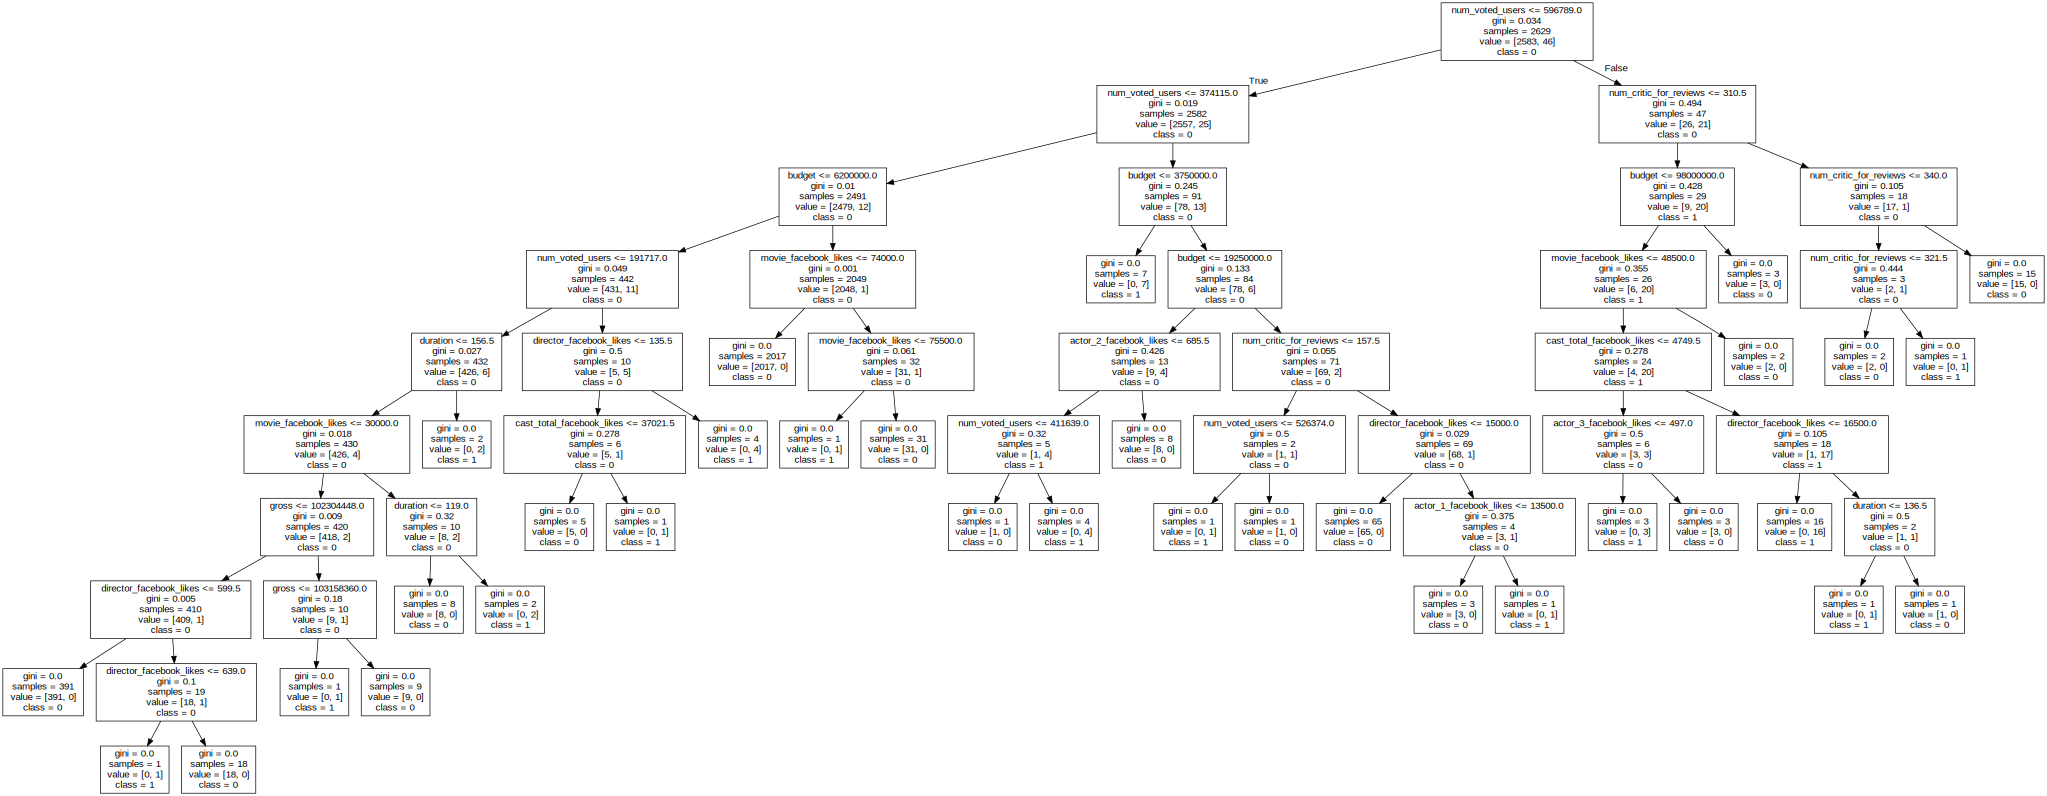

In [ ]:
tree = export_graphviz(clf,out_file='prtree.dot', feature_names=X_train.columns, class_names=['0','1'])
with open("/content/prtree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph, format="png")

In [ ]:
system(dot -Tpng prtree.dot -o prtree.png)

[]

### Which is the most popular genre?

In [ ]:
genre = df.groupby('genres')
genre.describe().head()

num_critic_for_reviews  ... y_both
                                                                    count  ...    max
genres                                                                     ...       
Action                                                               6.00  ...   0.00
Action|Adventure                                                     9.00  ...   1.00
Action|Adventure|Animation|Comedy|Crime|Family|...                   1.00  ...   0.00
Action|Adventure|Animation|Comedy|Drama|Family|...                   2.00  ...   0.00
Action|Adventure|Animation|Comedy|Family                             5.00  ...   0.00

[5 rows x 168 columns]

In [ ]:
genre_labels = set()
for s in df['genres'].str.split('|').values:
    genre_labels = genre_labels.union(set(s))

In [ ]:
def count_word(df, ref_col, liste):
    keyword_count = dict()
    for s in liste: keyword_count[s] = 0
    for liste_keywords in df[ref_col].str.split('|'):        
        if type(liste_keywords) == float and pd.isnull(liste_keywords): continue        
        for s in [s for s in liste_keywords if s in liste]: 
            if pd.notnull(s): keyword_count[s] += 1
    #______________________________________________________________________
    # convert the dictionary in a list to sort the keywords by frequency
    keyword_occurences = []
    for k,v in keyword_count.items():
        keyword_occurences.append([k,v])
    keyword_occurences.sort(key = lambda x:x[1], reverse = True)
    return keyword_occurences, keyword_count
keyword_occurences, dum = count_word(df, 'genres', genre_labels)
keyword_occurences[:10]

[['Drama', 1893],
 ['Comedy', 1461],
 ['Thriller', 1117],
 ['Action', 959],
 ['Romance', 859],
 ['Adventure', 781],
 ['Crime', 709],
 ['Fantasy', 507],
 ['Sci-Fi', 496],
 ['Family', 442]]

In [ ]:
keyword_occurences.insert(0,['genre','occurences'])
print(keyword_occurences)

[['genre', 'occurences'], ['Drama', 1893], ['Comedy', 1461], ['Thriller', 1117], ['Action', 959], ['Romance', 859], ['Adventure', 781], ['Crime', 709], ['Fantasy', 507], ['Sci-Fi', 496], ['Family', 442], ['Horror', 392], ['Mystery', 384], ['Biography', 239], ['Animation', 196], ['War', 152], ['Music', 151], ['History', 149], ['Sport', 148], ['Musical', 96], ['Western', 59], ['Documentary', 45], ['Film-Noir', 1]]


In [ ]:
maxGenre = df = pd.DataFrame(keyword_occurences[1:],columns=keyword_occurences[0])

In [ ]:
maxGenre

,genre,occurences
0,Drama,1893
1,Comedy,1461
2,Thriller,1117
3,Action,959
4,Romance,859
5,Adventure,781
6,Crime,709
7,Fantasy,507
8,Sci-Fi,496
9,Family,442


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0, 'Drama'),
 Text(0, 0, 'Comedy'),
 Text(0, 0, 'Thriller'),
 Text(0, 0, 'Action'),
 Text(0, 0, 'Romance'),
 Text(0, 0, 'Adventure'),
 Text(0, 0, 'Crime'),
 Text(0, 0, 'Fantasy'),
 Text(0, 0, 'Sci-Fi'),
 Text(0, 0, 'Family'),
 Text(0, 0, 'Horror'),
 Text(0, 0, 'Mystery'),
 Text(0, 0, 'Biography'),
 Text(0, 0, 'Animation'),
 Text(0, 0, 'War'),
 Text(0, 0, 'Music'),
 Text(0, 0, 'History'),
 Text(0, 0, 'Sport'),
 Text(0, 0, 'Musical'),
 Text(0, 0, 'Western'),
 Text(0, 0, 'Documentary'),
 Text(0, 0, 'Film-Noir')]

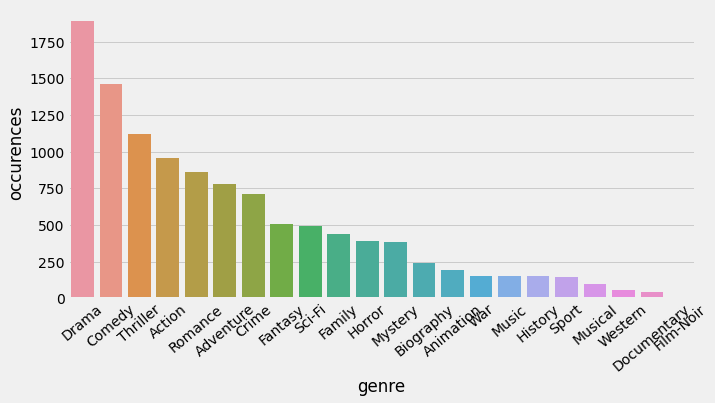

In [ ]:
plt.figure(figsize = (10,5))
ax = sns.barplot(maxGenre['genre'], maxGenre['occurences'], data=maxGenre)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 40)

### Whether non english movies are equally popular as english movies?

In [ ]:
englishMovies = df[df['language']=='English']
englishMovies.shape

KeyError: ignored

In [ ]:
foreignMovies = df[df['language']!='English']
foreignMovies.head()

In [ ]:
foreignMovies.shape

In [ ]:
englishMovies.sort_values(by=['imdb_score'],ascending=False, inplace=True)
englishMovies.head(10)

In [ ]:
englishMovies100 = englishMovies.head(100)
englishMovies100.head()

In [ ]:
foreignMovies.sort_values(by=['imdb_score'],ascending=False,inplace=True)
foreignMovies.head()

In [ ]:
foreignMovies100 = foreignMovies.head(100)
foreignMovies100.head()
foreignMovies100.shape

In [ ]:
print('The average rating of top 100 rated ENGLISH films is',englishMovies100['imdb_score'].mean())
print('The average rating of top 100 rated FOREIGN films is',foreignMovies100['imdb_score'].mean())

### Whether non english movies are equally earning profits as english movies?

In [ ]:
englishMovies.sort_values(by=['profit'],ascending=False, inplace=True)
englishMovies100 = englishMovies.head(100)
englishMovies.head()

In [ ]:
foreignMovies.sort_values(by=['profit'],ascending=False, inplace=True)
foreignMovies100 = foreignMovies.head(100)
foreignMovies.head()

In [ ]:
print('The average profit of top 100 rated ENGLISH films is',englishMovies100['profit'].mean())
print('The average profit of top 100 rated FOREIGN films is',foreignMovies100['profit'].mean())


  ## **8. Cluster**

### 8.1 K-mean Clustering Model

In [ ]:
df = pd.read_csv('movie_metadata.csv')
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.00,178.00,0.00,855.00,Joel David Moore,"1,000.00","760,505,847.00",Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.00,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,"3,054.00",English,USA,PG-13,"237,000,000.00","2,009.00",936.00,7.90,1.78,33000
1,Color,Gore Verbinski,302.00,169.00,563.00,"1,000.00",Orlando Bloom,"40,000.00","309,404,152.00",Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.00,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,"1,238.00",English,USA,PG-13,"300,000,000.00","2,007.00","5,000.00",7.10,2.35,0
2,Color,Sam Mendes,602.00,148.00,0.00,161.00,Rory Kinnear,"11,000.00","200,074,175.00",Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.00,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.00,English,UK,PG-13,"245,000,000.00","2,015.00",393.00,6.80,2.35,85000
3,Color,Christopher Nolan,813.00,164.00,"22,000.00","23,000.00",Christian Bale,"27,000.00","448,130,642.00",Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.00,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,"2,701.00",English,USA,PG-13,"250,000,000.00","2,012.00","23,000.00",8.50,2.35,164000
4,NaN,Doug Walker,nan,nan,131.00,nan,Rob Walker,131.00,nan,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.00,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,nan,NaN,NaN,NaN,nan,nan,12.00,7.10,nan,0


In [ ]:
df = df.dropna()
df.shape

(3756, 28)

In [ ]:
df = df.drop(columns = ['color','num_critic_for_reviews','duration','director_facebook_likes', 'actor_3_facebook_likes','actor_1_facebook_likes', 'facenumber_in_poster','num_user_for_reviews','title_year','actor_2_facebook_likes','aspect_ratio','director_name','actor_2_name','genres','actor_1_name','movie_title','actor_3_name', 'plot_keywords','movie_imdb_link', 'language', 'country', 'content_rating'])

In [ ]:
df.head(10)

,gross,num_voted_users,cast_total_facebook_likes,budget,imdb_score,movie_facebook_likes
0,"760,505,847.00",886204,4834,"237,000,000.00",7.90,33000
1,"309,404,152.00",471220,48350,"300,000,000.00",7.10,0
2,"200,074,175.00",275868,11700,"245,000,000.00",6.80,85000
3,"448,130,642.00",1144337,106759,"250,000,000.00",8.50,164000
5,"73,058,679.00",212204,1873,"263,700,000.00",6.60,24000
6,"336,530,303.00",383056,46055,"258,000,000.00",6.20,0
7,"200,807,262.00",294810,2036,"260,000,000.00",7.80,29000
8,"458,991,599.00",462669,92000,"250,000,000.00",7.50,118000
9,"301,956,980.00",321795,58753,"250,000,000.00",7.50,10000
10,"330,249,062.00",371639,24450,"250,000,000.00",6.90,197000


In [ ]:
# Determine Attrition
#Create X and Y Variables

X = df.iloc[:, 3:33]
y = df.iloc[:, 1]

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
x_scaled = scaler.transform(X)

In [ ]:
#Create Purity Score

from sklearn import metrics

def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix) 

In [ ]:
#K-Means Clustering

kmeans = KMeans(n_clusters = 2, init = 'random', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x_scaled)
purity_score(y,y_kmeans)

0.0013312034078807242

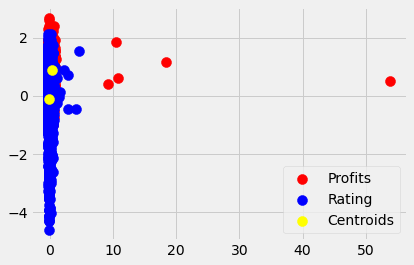

In [ ]:
#Visualize K-Means Clustering

plt.scatter(x_scaled[y_kmeans == 0, 0], x_scaled[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Profits')
plt.scatter(x_scaled[y_kmeans == 1, 0], x_scaled[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Rating')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.legend()

In [ ]:
pd.DataFrame(y_kmeans, columns=["Cluster"])

,Cluster
0,0
1,1
2,0
3,0
4,1
...,...
3751,1
3752,1
3753,1
3754,1


In [ ]:
pd.options.display.float_format='{:,.2f}'.format

centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centroids

In [ ]:
def cluster_sizes(clusters):
    #clusters is an array of cluster labels for each instance in the data
    
    size = {}
    cluster_labels = np.unique(clusters)
    n_clusters = cluster_labels.shape[0]

    for c in cluster_labels:
        size[c] = len(X[clusters == c])
    return size

In [ ]:
size = cluster_sizes(y_kmeans)

for c in size.keys():
    print("Size of Cluster", c, "= ", size[c])



Size of Cluster 0 =  436
Size of Cluster 1 =  3320


### 8.2 K-Medoid Clustering Model

In [ ]:
#K-Medoids Clustering

kMedoids = KMedoids(n_clusters = 4, random_state=0)
y_kmed = kMedoids.fit(x_scaled)
clusters = kMedoids.predict(X)

In [ ]:
#Cluster Labels

clusters

array([2, 2, 2, ..., 2, 2, 2])

In [ ]:
#Lowest SSE

kMedoids.inertia_

2294.7576232499705

In [ ]:
#Create Silhouette Width Average for Overall Model

from sklearn.metrics import silhouette_samples, silhouette_score
kMedoids = KMedoids(n_clusters = 4)
kMedoids.fit(x_scaled)
y_kmed = kMedoids.fit_predict(x_scaled)
silhouette_avg = silhouette_score(x_scaled, y_kmed)
print(silhouette_avg)

0.3447767939588141


In [ ]:
#Show Silhouette Width Average per Cluster

sample_silhouette_values = silhouette_samples(x_scaled, y_kmed)
for i in range(4):
    ith_cluster_silhouette_values = sample_silhouette_values[y_kmed == i]
    print(np.mean(ith_cluster_silhouette_values))

0.29963486699028186
0.4687846896085403
0.04163527935830137
0.35093312677628746


In [ ]:
#Calculate and Append Silhouette Width Average for 2-11 Clusters

sw = []

for i in range(2, 11):
    kMedoids = KMedoids(n_clusters = i)
    kMedoids.fit(x_scaled)
    y_kmed = kMedoids.fit_predict(x_scaled)
    silhouette_avg = silhouette_score(x_scaled, y_kmed)
    sw.append(silhouette_avg)

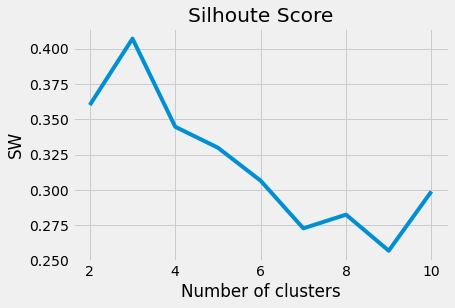

In [ ]:
#Visualize the Silhouette Width Average

plt.plot(range(2, 11), sw)
plt.title('Silhoute Score')
plt.xlabel('Number of clusters')
plt.ylabel('SW')      #within cluster sum of squares
plt.show()

In [ ]:
#K-Medoids Clusting

kmedoids = KMedoids(n_clusters=2, random_state=0).fit(X)
y_kmed = kmedoids.fit_predict(x_scaled)
purity_score(y,y_kmed)

0.0010649627263045794

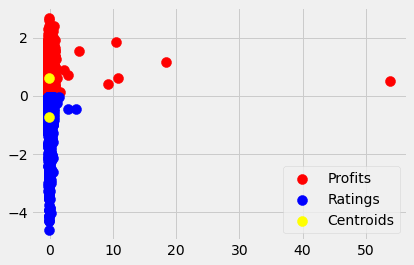

In [ ]:
#Visualize K-Medoids Clusters

plt.scatter(x_scaled[y_kmed == 0, 0], x_scaled[y_kmed == 0, 1], s = 100, c = 'red', label = 'Profits')
plt.scatter(x_scaled[y_kmed == 1, 0], x_scaled[y_kmed == 1, 1], s = 100, c = 'blue', label = 'Ratings')

plt.scatter(kmedoids.cluster_centers_[:, 0], kmedoids.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.legend()

### 8.3 Hierarchical Clustering Model

In [ ]:
#Hierarchical Clustering

from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
cluster.fit_predict(x_scaled)

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
#Print Clusters

print(cluster.labels_)

[0 0 1 ... 0 0 0]


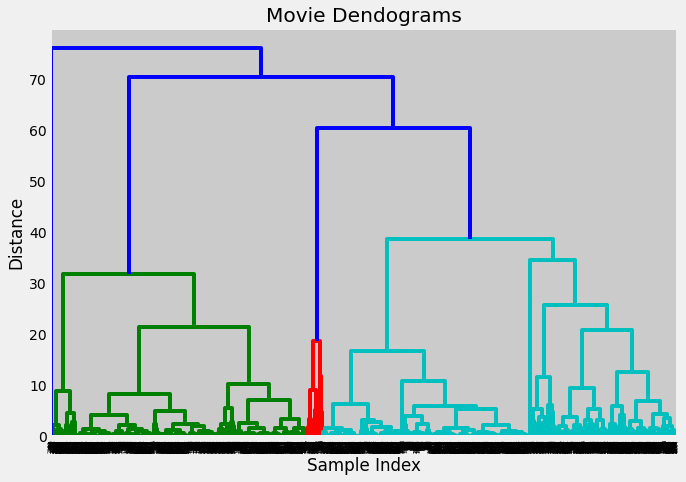

In [ ]:
#Visualize Dendrograms

import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Movie Dendograms")
plt.xlabel('Sample Index')
plt.ylabel('Distance')
dend = shc.dendrogram(shc.linkage(x_scaled, method='ward'))